El preprocesamiento de los datos para que estén listo para su modelación incluye los siguientes pasos:



1.   Importación de las bases.
2.   Exploración preliminar de la información.
3.   Tratamiento de datos faltantes.
4.   Análisis univariado de la respuesta y análisis bivariado respecto a los predictores.
5.   Ingeniería y transformación de variables.
6.   Eliminación de algunas variables predictoras.
7.   Análisis de datos atípicos.
8.   Generación de conjunto de entrenamiento y validación

Veamos a continuación cómo se realizan estos pasos a los datos del titanic empleado diversas librerías de python.



## 1) Importación de los datos

Para importar los datos se tiene primero que descargar de la página de kaggle, previamente un registro como usuario.

Los datos se tienen que guarda en la carpeta de "Colab Notebooks".




Para poder acceder a los datos es necesario primero montar el drive en google colab, para lo cual se corre el siguiente código:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


Una vez hecha la conexión se busca importar la información. Para esto se usa la biblioteca de **pandas** la cual permite trabajar con marcos de datos:

Un **marco de datos**, también conocido como base de datos, es un *conjunto de datos organizado en renglones y columnas* de tal manera que ***cada columna*** corresponde a una variable o característica de interés registrada para cada elemento observado y ***cada renglón*** contiene información de las diferentes variables sobre cada uno de los elementos o unidades.

Las columnas o variables pueden ser de diferentes tipos; sin embargo, ***todos los elementos de una misma columna deben tener el mismo tipo***, ya sea numérico, lógico o de caracteres.

In [1]:
#Se carga la librería pandas y numpy
import pandas as pd
import numpy as np

Se usa la función `read_csv()` del paquete **pandas** para cargar los datos.



In [4]:
#Se guarda en la dirección donde está alojado el archivo en un objeto tipo caracter
# datos_titanic = "/content/drive/MyDrive/Colab Notebooks/Datos titanic/train.csv"
datos_titanic = "titanic.csv"

df_titanic = pd.read_csv(datos_titanic)

Puedo ***visualizar*** el marco de los datos si pongo en una celda el nombre del objeto que contiene el data.frame

In [5]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2) Exploración preliminar de la información

Una vez cargados lo datos es necesario hacer una ***inspección inicial*** para conocer ***características de la base*** como por ejemplo el **número de columnas**, **tipos de campos**, **registros con datos faltantes**, y obtener algunos **estadísticos básicos**  para de las *variables continuas* como **media, mediana, moda, mínimo, máximo,** y para *variables discretas:* **frecuencias relativas**.

Esta información será un **punto de partida** para el tratamiento posterior, ya que nos dará un panorama general de la estructura de los datos.




Para saber **cuántas filas y columnas** se puede usar el atributo `shape`

In [6]:
df_titanic.shape

(891, 12)

Se tiene un dataframe de 891 filas y 12 columas

Para conocer el **nombre de las columnas** se puede listar el atributo `columns`

In [7]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

La información anterior se puede también obtener directamente del método `info()`

In [8]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Para obtener **estadísticas descriptivas**, se usa el método `describe()`.

Las e**stadísticas descriptivas** incluyen las que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores NaN.

In [9]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Seleccionar columnas de tipo 'object'
df_columnas_object = df_titanic.select_dtypes(include='object')

# Obtener el número de valores únicos para cada columna tipo object
df_resumen = df_columnas_object.nunique().reset_index()
df_resumen.columns = ['Variable', 'Valores Únicos']

# Mostrar el resumen
print(df_resumen)

   Variable  Valores Únicos
0      Name             891
1       Sex               2
2    Ticket             681
3     Cabin             147
4  Embarked               3


En este punto es importante identificar si existen variables que **no dan información** para la generación de los modelos de predicción, l**as cuales deben ser removidas** antes de continuar el análisis de los datos, ya que evitan análisis y tiempo de computo innecesarios.

 Este tipo de variables se conoce como **no informativas**, y generalmente son campos para los cuales resulta evidente su nula relación con la variable de respuesta.

  Como ejemplo se tiene algún campo relacionado con **“llaves”** para el manejo de bases de datos, o algún identificador de los registros de la base.



---
Con el método drop podemos especificar filas o columnas a eliminar.


In [11]:
print(df_titanic.shape)
df_titanic.drop(['PassengerId'], axis = 'columns', inplace=True)
print(df_titanic.shape)

(891, 12)
(891, 11)


## 3) Ingeniería de variables

Una de las variables que se pueden generar es el del título de tratamiento de cortesía, el cual se puede obtener de la variable **Name**, a través del siguiente código:

In [12]:
#Extrae todos los titulos que tienen un Mr., Mrs. Miss.
df_titanic['Title'] = df_titanic['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

# Quita espacios antes y después
df_titanic['Title'] = df_titanic['Title'].str.strip()

#Para mostrar los casos
Conteo_Title = df_titanic['Title'].value_counts()
print(Conteo_Title)

# Se crea una función para generar solamente 5 niveles
def map_titles(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    else:
        return 'Rare Title'

# Se aplica la función
df_titanic['Title'] = df_titanic['Title'].apply(map_titles)

#Se muestra el resultado
print("Resultado de generar variable con 5 niveles:")
print(df_titanic['Title'].value_counts())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64
Resultado de generar variable con 5 niveles:
Title
Mr            517
Miss          182
Mrs           125
Master         40
Rare Title     27
Name: count, dtype: int64


Para revisar cúales son las columna que tienen datos faltantes se pueden usar dos métodos concatenados `dataframe.isnull().sum()`. Aunque previamente la variable ya se habia visto con describe(), cuantos no nulos tenía cada variable.

Una vez extraido el titulo e tratamiento de cortesíala variable **Name**, es recomendable eliminarla, pues tiene tantos niveles como nombres diferentes. ***Variables categóricas con muchos niveles***, resultan en problemas al momento de estimar modelos de aprendizaje estadístico.

In [13]:
print(df_titanic.shape)
df_titanic.drop(['Name'], axis = 'columns', inplace=True)
df_titanic.shape

(891, 12)


(891, 11)

Además, ya hemos observado que la variable **Ticket** tiene algunas entradas duplicadas. Algunos pasajeros comparten el número de billete porque están juntos. Pueden tener una relación con un empleado o un servicio, como una asistenta o una niñera, o pueden ser amigos íntimos.

Podemos extraer información implícita de los valores duplicados en la variable **Ticket**  y crear una nueva variable para describirla. Aquí diseñamos la nueva variable "Companions" que describe el número de acompañantes o compañeros de viaje de cada individuo.

In [14]:
# Crear una nueva columna 'Companions'
df_titanic['Companions'] = df_titanic.groupby('Ticket')['Ticket'].transform('count')
df_titanic['Companions']=df_titanic['Companions']-1

# Mostrar la distribución del número de acompañantes
df_titanic['Companions'].value_counts()

Companions
0    547
1    188
2     63
3     44
6     21
5     18
4     10
Name: count, dtype: int64

In [15]:
df_titanic['Companions']=df_titanic['Companions']-1

Una vez extraido el número de acompañantes de la variable **Ticket**, es recomendable eliminarla, pues tiene muchjos diferentes niveles

In [16]:
print(df_titanic.shape)
df_titanic.drop(['Ticket'], axis = 'columns', inplace=True)
df_titanic.shape

(891, 12)


(891, 11)

## 4) Tratamiento de datos faltantes

Cuando se está trabajando con una base de datos es importante revisar si algunas **variables explicativas** tienen datos faltantes, pues esto puede afectar el ajuste de los **modelos estadísticos de aprendizaje**.

Si bien es cierto que algunos modelos pueden manejar esta circunstancia (como los*** modelos de árboles de decisión y sus extensiones***), generalmente es adecuado aplicar alguna de las siguientes alternativas.

(1) Si la cantidad de información es grande, y el **porcentaje de registros con datos faltantes es pequeño** (<5\%), se puede optar por quitarlos y trabajar con el subconjunto de datos completos.

(2) Sin embargo, a veces la base de datos no es tan extensa o se quiere aprovechar la información que aportan las demás variables por lo que en este caso se puede proceder a **imputar** los datos faltantes, esto es, ***rellenar los registros de los campos vacíos***.

In [17]:
df_titanic.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Cabin         687
Embarked        2
Title           0
Companions      0
dtype: int64

In [18]:
#Si lo divido entre el número total de entradas obtengo la proporción de faltantes
df_titanic.isnull().sum()/df_titanic.shape[0]

Survived      0.000000
Pclass        0.000000
Sex           0.000000
Age           0.198653
SibSp         0.000000
Parch         0.000000
Fare          0.000000
Cabin         0.771044
Embarked      0.002245
Title         0.000000
Companions    0.000000
dtype: float64

En el caso de la variable Cabin, se tiene una cantidad muy alta de valores ausentes 77%. Se considera que imputar estos valores introducirá más ruido al modelo que lo que puede ser útil, por lo que se decide quitar esta variable de la base.

In [19]:
print(df_titanic.shape)
df_titanic.drop(['Cabin'], axis = 'columns', inplace=True)
df_titanic.shape

(891, 11)


(891, 10)

Se va a usar el paquete missForest() de R. Por tal motivo se carga el paquete rpy2 que permite usar código de R en Python

In [21]:
%load_ext rpy2.ipython

Error importing in API mode: ImportError("dlopen(/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/_rinterface_cffi_api.abi3.so, 0x0002): Library not loaded: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib\n  Referenced from: <2C0ED2AB-7769-33B2-ADBF-523D13D5F794> /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/_rinterface_cffi_api.abi3.so\n  Reason: tried: '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file)")
Trying to import in ABI mode.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/rpy2/rinterface/__init__.py:1185: UserWarning: Environment variable "PWD" redefined by R and overriding e

Una vez cargado el paquete rpy2, hay dos formas de correr R en google colab.


1.   Usando el comando inicial %%R para posteriormente usar puro código de R en esa celda de código
2.   Empleando %R para combinar código Python y R en una celda de puro código Python.



Como ejemplo del primer caso se tiene:

In [22]:
%%R
print("Hola mundo")
x <- c(78, 12, 23, 67)
y <- c(34, 23, 36, 45)
z <- x+y
print(z)


[1] "Hola mundo"
[1] 112  35  59 112


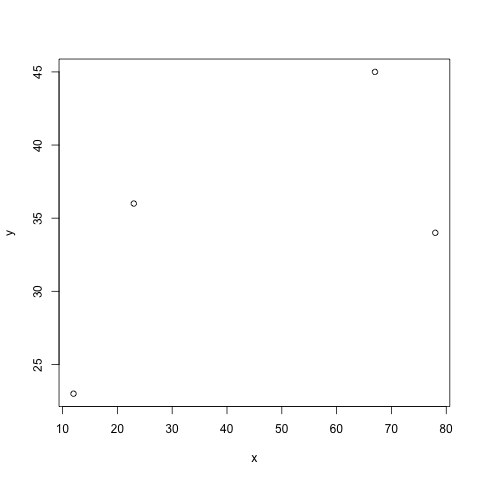

In [23]:
%%R
plot(x,y)

Como en el segundo caso se tiene:


In [37]:
a = 5
print("En python")
print(type(5))

%R print("En R:")
%R print(class(x))
%R w <- x - y
%R print(mean(w))

print("En python de nuevo:")
b=10
c = a+b
print(c)


En python
<class 'int'>
[1] "En R:"
[1] "numeric"
[1] 10.5
En python de nuevo:
15


Instalar paquetes en R. Recomendablecrear una carpeta en el Drive. En este caso se llamó r-lib

In [30]:
%%R
#El código está comentado porque el paquete ya está instalado
#lib_loc <- "/content/drive/MyDrive/r-lib"
#install.packages("missForest", lib = lib_loc)

NULL


Para cargar paqueterías hay que especificar la dirección donde están guardadas:

In [42]:
%%R
install.packages("missForest", repos = "https://cloud.r-project.org")
library(missForest)


The downloaded binary packages are in
	/var/folders/zr/py0pd6bs6gnfzg9ljbgr9v0c0000gn/T//RtmpGR7fNx/downloaded_packages


also installing the dependencies ‘rngtools’, ‘foreach’, ‘itertools’, ‘iterators’, ‘doRNG’

probando la URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/rngtools_1.5.2.tgz'
Content type 'application/x-gzip' length 78336 bytes (76 KB)
downloaded 76 KB

probando la URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/foreach_1.5.2.tgz'
Content type 'application/x-gzip' length 140048 bytes (136 KB)
downloaded 136 KB

probando la URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/itertools_0.1-3.tgz'
Content type 'application/x-gzip' length 112503 bytes (109 KB)
downloaded 109 KB

probando la URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/iterators_1.0.14.tgz'
Content type 'application/x-gzip' length 346993 bytes (338 KB)
downloaded 338 KB

probando la URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/doRNG_1.8.6.2.tgz'
Content type 'application/x-gzip' length 42056 bytes (41 KB)
downloaded 4

In [43]:
#Guardo el dataframe en un archivo csv
df_titanic.to_csv('df_titanic.csv', index=False)

In [46]:
%%R
df_titanic <- read.csv('df_titanic.csv')

In [47]:
#Pasar el dataframe de python a R:
#%R -i df_titanic
%R print("Tipo de objeto:")
%R print(class(df_titanic))
%R print("Imprimir las primeras 5 filas:")
%R print(head(df_titanic,3))
%R print("Tipos de datos:")
%R print(str(df_titanic))

[1] "Tipo de objeto:"
[1] "data.frame"
[1] "Imprimir las primeras 5 filas:"
  Survived Pclass    Sex Age SibSp Parch    Fare Embarked Title Companions
1        0      3   male  22     1     0  7.2500        S    Mr         -1
2        1      1 female  38     1     0 71.2833        C   Mrs         -1
3        1      3 female  26     0     0  7.9250        S  Miss         -1
[1] "Tipos de datos:"
'data.frame':	891 obs. of  10 variables:
 $ Survived  : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass    : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex       : chr  "male" "female" "female" "female" ...
 $ Age       : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp     : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch     : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare      : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked  : chr  "S" "C" "S" "S" ...
 $ Title     : chr  "Mr" "Mrs" "Miss" "Mrs" ...
 $ Companions: int  -1 -1 -1 0 -1 -1 -1 2 1 0 ...
NULL


In [48]:
%%R
#Función que convierte character a tipo factor
chr_to_factor <- function(col) {
    if(is.character(col))
    { as.factor(col) }
    else { col }
}
#Aplico la función al dataframe con lapply
ls_titanic <- lapply(df_titanic, chr_to_factor)
#Convertimos la lista a data.frame
df_titanic <- data.frame(ls_titanic)
str(df_titanic)

'data.frame':	891 obs. of  10 variables:
 $ Survived  : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass    : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex       : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age       : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp     : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch     : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare      : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked  : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 $ Title     : Factor w/ 5 levels "Master","Miss",..: 3 4 2 4 3 3 3 1 4 4 ...
 $ Companions: int  -1 -1 -1 0 -1 -1 -1 2 1 0 ...


In [49]:
%%R
#Valores faltantes
print("Dataframe original")
print(colSums(is.na(df_titanic)))

#Se hace la imputación y se guarda el data.frame con otro nombre
titanic_imp_rf <- missForest(df_titanic)

#Convertimos el objeto a un data.frame la matriz titanic_imp_rf$ximp
df_titanic_imp_rf <- data.frame(titanic_imp_rf$ximp)

#Valores faltantes
print("Datos imputados:")
print(colSums(is.na(df_titanic_imp_rf)))


[1] "Dataframe original"
  Survived     Pclass        Sex        Age      SibSp      Parch       Fare 
         0          0          0        177          0          0          0 
  Embarked      Title Companions 
         0          0          0 
[1] "Datos imputados:"
  Survived     Pclass        Sex        Age      SibSp      Parch       Fare 
         0          0          0          0          0          0          0 
  Embarked      Title Companions 
         0          0          0 


In [70]:
#Pasar el objeto de R a Python
df_titanic = None
df_titanic_imp_rf = None
%R -o df_titanic
%R -o df_titanic_imp_rf

In [72]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Companions
1,0,3,male,22.0,1,0,7.2500,S,Mr,-1
2,1,1,female,38.0,1,0,71.2833,C,Mrs,-1
3,1,3,female,26.0,0,0,7.9250,S,Miss,-1
4,1,1,female,35.0,1,0,53.1000,S,Mrs,0
5,0,3,male,35.0,0,0,8.0500,S,Mr,-1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,Rare Title,-1
888,1,1,female,19.0,0,0,30.0000,S,Miss,-1
889,0,3,female,NaN,1,2,23.4500,S,Miss,0
890,1,1,male,26.0,0,0,30.0000,C,Mr,-1


In [71]:
df_titanic_imp_rf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Companions
1,0,3,male,22.000000,1,0,7.2500,S,Mr,-1
2,1,1,female,38.000000,1,0,71.2833,C,Mrs,-1
3,1,3,female,26.000000,0,0,7.9250,S,Miss,-1
4,1,1,female,35.000000,1,0,53.1000,S,Mrs,0
5,0,3,male,35.000000,0,0,8.0500,S,Mr,-1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S,Rare Title,-1
888,1,1,female,19.000000,0,0,30.0000,S,Miss,-1
889,0,3,female,9.331429,1,2,23.4500,S,Miss,0
890,1,1,male,26.000000,0,0,30.0000,C,Mr,-1


In [68]:
%%R
df_dif <- data.frame(
    Original = df_titanic$Age,
    Imputado = df_titanic_imp_rf$Age
)

print(df_dif)

    Original  Imputado
1      22.00 22.000000
2      38.00 38.000000
3      26.00 26.000000
4      35.00 35.000000
5      35.00 35.000000
6         NA 38.206847
7      54.00 54.000000
8       2.00  2.000000
9      27.00 27.000000
10     14.00 14.000000
11      4.00  4.000000
12     58.00 58.000000
13     20.00 20.000000
14     39.00 39.000000
15     14.00 14.000000
16     55.00 55.000000
17      2.00  2.000000
18        NA 34.339959
19     31.00 31.000000
20        NA 30.418396
21     35.00 35.000000
22     34.00 34.000000
23     15.00 15.000000
24     28.00 28.000000
25      8.00  8.000000
26     38.00 38.000000
27        NA 30.984529
28     19.00 19.000000
29        NA 19.833161
30        NA 28.161571
31     40.00 40.000000
32        NA 28.274380
33        NA 20.387434
34     66.00 66.000000
35     28.00 28.000000
36     42.00 42.000000
37        NA 24.827064
38     21.00 21.000000
39     18.00 18.000000
40     14.00 14.000000
41     40.00 40.000000
42     27.00 27.000000
43        N

In [74]:
pd.DataFrame({
    "Original": df_titanic["Age"],
    "Imputado": df_titanic_imp_rf["Age"]
})

,Original,Imputado
1,22.0,22.000000
2,38.0,38.000000
3,26.0,26.000000
4,35.0,35.000000
5,35.0,35.000000
...,...,...
887,27.0,27.000000
888,19.0,19.000000
889,NaN,9.331429
890,26.0,26.000000
